<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/Pytorch_2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Session 2: Linear regression

In [2]:
import torch
import numpy as np

# 1. Gradient descent

## 1.1 Gradient descent in 1-dim

### Example 1: 
You are given 

$f(x)=(x-2)^2+3$.

You want to minimize ```f``` by finding proper value of ```x=x^*```.

You know 

$\frac{d f}{d x}=2(x-2)$.

You want to start $x_0 = 6$ with learning rate ```lr=0.1```.

In [3]:
def f(x):
  return (x-2.0)**2 + 3
def df(x):
  return 2*(x-2.0)

lr=0.01

In [4]:
x=6.0
x0=2.0
x1 = x0-lr*df(x0)
x2=x1-lr*df(x1)
#이짓반복

for i in range(1000):
  x-=lr*df(x)
print(x)

#f(x)없이도 최소를내는 x값을 구할 수 있다

2.0000000067318697


In [5]:
def df(x):
  return 2*(x-2)

lr=0.1
x0 = 6.0 

df0 = df(x0)
x1 = x0 - lr*df0

df1 = df(x1)
x2 = x1 - lr*df1


for i in range(500):
  x0-=lr*df(x0)
print(x0)

2.000000000000001


In [6]:
print(df0, x0)
print(df1, x1)
print(x2)

8.0 2.000000000000001
6.4 5.2
4.5600000000000005


In [7]:
x=6
lr=0.1
print(x, df(x))
for i in range(10):
  x=x-lr*df(x)
  print(x, df(x))

6 8
5.2 6.4
4.5600000000000005 5.120000000000001
4.048 4.096
3.6384 3.2767999999999997
3.31072 2.6214399999999998
3.0485759999999997 2.0971519999999995
2.8388608 1.6777216
2.67108864 1.3421772799999996
2.536870912 1.0737418239999998
2.4294967296 0.8589934591999997


In [8]:
df(1.34)

-1.3199999999999998

## 1.2 Gradient descent in 2 dim

### Example 2: 
You are given 

$f(\boldsymbol{\beta})=(\beta_1-2)^2+3(\beta_2-3)^2+3$.

You want to minimize ```f``` by finding proper value of ```\boldsymbol{\beta}```.

You know 

$\triangledown f=(2(\beta_1-2), 3(\beta_2-3))$.

In [9]:
import numpy as np
beta=np.array([10.0,20.0])

lr = 0.01
history = []

def df(beta):
  return np.array([2*(beta[0]-2), 6*(beta[1]-3)])
for i in range(100):
  beta=beta-lr*df(beta)
  history.append(beta)

In [10]:
print(beta)
print(history)

[3.06095645 3.03493287]
[array([ 9.84, 18.98]), array([ 9.6832, 18.0212]), array([ 9.529536, 17.119928]), array([ 9.37894528, 16.27273232]), array([ 9.23136637, 15.47636838]), array([ 9.08673905, 14.72778628]), array([ 8.94500427, 14.0241191 ]), array([ 8.80610418, 13.36267196]), array([ 8.6699821 , 12.74091164]), array([ 8.53658246, 12.15645694]), array([ 8.40585081, 11.60706952]), array([ 8.27773379, 11.09064535]), array([ 8.15217911, 10.60520663]), array([ 8.02913553, 10.14889423]), array([7.90855282, 9.71996058]), array([7.79038176, 9.31676294]), array([7.67457413, 8.93775717]), array([7.56108265, 8.58149174]), array([7.44986099, 8.24660223]), array([7.34086377, 7.9318061 ]), array([7.2340465 , 7.63589773]), array([7.12936557, 7.35774387]), array([7.02677826, 7.09627924]), array([6.92624269, 6.85050248]), array([6.82771784, 6.61947233]), array([6.73116348, 6.40230399]), array([6.63654021, 6.19816575]), array([6.54380941, 6.00627581]), array([6.45293322, 5.82589926]), array([6.36387

In [11]:
#history(list)>history(array)
history_array =np.array(history)
beta_x=history_array[:,0]
beta_y=history_array[:,1]


In [12]:
history_array.shape

(100, 2)

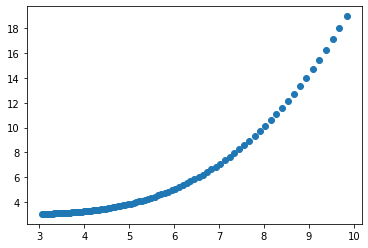

In [13]:
import matplotlib.pyplot as plt
plt.scatter(beta_x, beta_y)

In [14]:
import numpy as np
beta=np.array([10.0,20.0])
lr=0.1
print(beta, df(beta))
def df(beta):
  return np.array([2*(beta[0]-2), 6*(beta[1]-3)])
for i in range(20):
  beta = beta - lr*df(beta)
  print(beta, df(beta))

[10. 20.] [ 16. 102.]
[8.4 9.8] [12.8 40.8]
[7.12 5.72] [10.24 16.32]
[6.096 4.088] [8.192 6.528]
[5.2768 3.4352] [6.5536 2.6112]
[4.62144 3.17408] [5.24288 1.04448]
[4.097152 3.069632] [4.194304 0.417792]
[3.6777216 3.0278528] [3.3554432 0.1671168]
[3.34217728 3.01114112] [2.68435456 0.06684672]
[3.07374182 3.00445645] [2.14748365 0.02673869]
[2.85899346 3.00178258] [1.71798692 0.01069548]
[2.68719477 3.00071303] [1.37438953 0.00427819]
[2.54975581 3.00028521] [1.09951163 0.00171128]
[2.43980465 3.00011409] [8.79609302e-01 6.84510413e-04]
[2.35184372 3.00004563] [7.03687442e-01 2.73804165e-04]
[2.28147498 3.00001825] [5.62949953e-01 1.09521666e-04]
[2.22517998 3.0000073 ] [4.50359963e-01 4.38086664e-05]
[2.18014399 3.00000292] [3.60287970e-01 1.75234666e-05]
[2.14411519 3.00000117] [2.88230376e-01 7.00938663e-06]
[2.11529215 3.00000047] [2.30584301e-01 2.80375465e-06]
[2.09223372 3.00000019] [1.84467441e-01 1.12150186e-06]


We can solve Example 2 using pytorch and auto differentiation.

In [18]:
 # 시작점 지정, requires_grad == 연쇄법칙에 의해.. 베타와 관련된계산은 추적해라! 각 단계에서의 beta값을 기억함
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3
def loss(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3 

beta = torch.tensor([10.0, 20.0], requires_grad=True) #tensor는 알아서 미분값까지 계산해줌
lr=0.1
history=[]
for i in range(20):
  myloss=loss(beta)
  myloss.backward()
  beta.data=beta.data-lr*beta.grad #로스를 베타에 대해 미분해주세요인데 베타가 안들어가고있음
  #beta = beta-lr*beta.grad 혹은 beta.data=beta.data-lr*beta.grad
  #beta.grad...?!
  history.append(beta)

In [19]:
beta = torch.tensor([10.0, 20.0], requires_grad=True) # 시작점 지정, requires_grad == 연쇄법칙에 의해.. 베타와 관련된계산은 추적해라! 각 단계에서의 beta값을 기억함
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3

loss = f(beta)
#def loss(beta): return (beta[0]-2)**2+3*(beta[1]-3)**2+3 과 동일

loss.backward() #미분해라라!
beta.grad

beta.data = beta.data - lr*beta.grad
print(beta)
beta.grad.data.zero_() # this is important!!!

tensor([8.4000, 9.8000], requires_grad=True)


tensor([0., 0.])

In [20]:
loss=f(beta)
loss.backward()
beta.grad

beta.data = beta.data - lr*beta.grad
print(beta)
beta.grad.data.zero_()

tensor([7.1200, 5.7200], requires_grad=True)


tensor([0., 0.])

In [21]:
lr=0.1
beta = torch.tensor([10.0, 20.0], requires_grad=True)
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3
print(beta.data)
history = []
for i in range(5):
  loss = f(beta)
  history.append(loss.item()) 
  #그냥 history로 하면 밑에서 plt를 그릴 수 없음
  #myloss.numpy가 오류뜨기 때문에 숫자만빼와서 저장하겠다는 item()으로 저장
  loss.backward()
  beta.data = beta.data - lr*beta.grad
  beta.grad.zero_()# 이거 안하면 그래디언트를 누적(accumulate)하기 때문에 남아있는 그래디언트를 0으로 초기화해줄게
  #위치옮기면 gradient가 0될수도 있으니 옮기지말자ㅣ
  print(beta.data)

tensor([10., 20.])
tensor([8.4000, 9.8000])
tensor([7.1200, 5.7200])
tensor([6.0960, 4.0880])
tensor([5.2768, 3.4352])
tensor([4.6214, 3.1741])


In [22]:
import matplotlib.pyplot as plt 

In [23]:
history

[934.0,
 182.67999267578125,
 51.40959548950195,
 23.328445434570312,
 14.30561351776123]

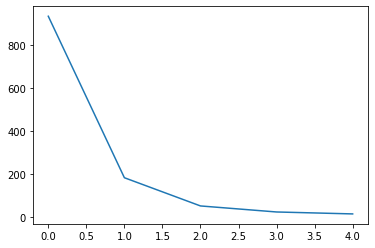

In [24]:
plt.plot(history)

## 2. Linear Regression 1D (using autograd): 


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=wx+b$


First, define the parameters:


In [25]:
#정답
w0 = torch.tensor(2.0)
b0 = torch.tensor(-1.0)

In [26]:
xs=torch.tensor([1.5, 3.0, 2.7])
yhats = w0*xs+b0

## 2.1 Make some data

In [27]:
torch.manual_seed(2021)
X = torch.arange(-3,3, 0.1).view(-1, 1)
f = w0*X+b0
print(X.shape, f.shape)

torch.Size([60, 1]) torch.Size([60, 1])


In [28]:
Y = f + torch.randn(f.shape)

In [29]:
X.shape
Y.shape

torch.Size([60, 1])

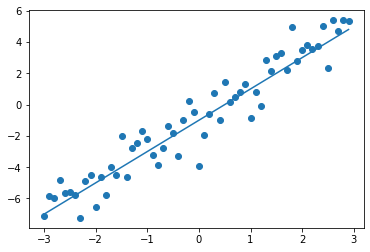

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(),Y.numpy())
plt.plot(X.numpy(),f.numpy())

#파란선이 정답, 오차로 인해 점처럼 잔차 발생

In [31]:
X.shape

torch.Size([60, 1])

In [32]:
Y.shape

torch.Size([60, 1])

## 2.2 Create the model and cost function

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*w +b$.

In [33]:
W=torch.tensor([[10.0]], requires_grad=True) #[1,]차원)
b=torch.tensor([20.0], requires_grad=True)


In [38]:
w = torch.tensor([[10.0]], requires_grad = True) 
b=torch.tensor([-5.0],requires_grad=True)

Yhat = X @ w + b
def myloss(yhat,y):
  return torch.mean((yhat-y)**2)
lr=0.01
history=[]
epochs=100
for i in range(epochs):
  Yhat=X@w+b
  current_loss=myloss(Yhat,Y)
  history.append(current_loss.item())
  #얘의 그래디언트 계산 (미분 requires grad 따라)
  current_loss.backward()
  w.data=w.data-lr* w.grad.data
  b.data=b.data-lr* b.grad.data
  #미분 축적 안되게 0
  w.grad.zero_()
  b.grad.zero_()

In [40]:
lr=0.01
for i in range(100):
  yhat = X @ w + b
  myloss = loss(yhat, Y)
  history.append(myloss.item())
  myloss.backward()#chain rule 적용 시 바깥에서부터 미분해서(?) backward라 함../##myloss를를 w와 b로 미분
  w.data=w.data-lr*w.grad.data
  b.data=b.data-lr*b.grad.data
  w.grad.zero_()
  b.grad.zero_()


TypeError: ignored

In [41]:
def forward(x):
  return x*w+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
  
w = torch.tensor(10.0, requires_grad=True)
b = torch.tensor(10.0, requires_grad=True)

In [42]:
history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss = criterion(Yhat,Y)
  history.append(loss.item())
  loss.backward()
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  w.grad.data.zero_()
  b.grad.data.zero_()




Now our goal is to find ```w``` and ```b``` which minimize ```loss``` function.

In [43]:
w

tensor(2.0347, requires_grad=True)

In [44]:
b

tensor(-0.8091, requires_grad=True)

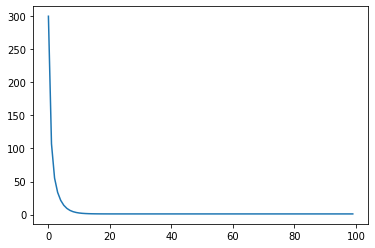

In [45]:
plt.plot(history)

# 3. Stochastic Gradient Descent (SGD) using Dataset and DataLoader

In [46]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
#tensor는 tensor끼리 계산해야함

In [47]:
dataset = TensorDataset(X, Y)
#dataset이이 어쩔수 없이 필요함

In [48]:
dataset[:3]

(tensor([[-3.0000],
         [-2.9000],
         [-2.8000]]), tensor([[-7.1452],
         [-5.8253],
         [-5.9977]]))

In [49]:
##################
### Do not run ###
##################

class test1():
  def __init__(self):
    self.x=[102,20,30]
  def __getitem__(self, index):
    return self.x[index]

mydata = test1()
mydata[0]

# Create class Data

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        f = w0*self.x+b0
        self.y = f+torch.randn(f.shape)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len


dataset = Data()        
X,Y=dataset[:]

In [50]:
dataset = TensorDataset(X,Y)

In [51]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True) #shuffle : 섞자 

In [52]:
xxx = torch.tensor([10,9,8,7,6,5,4,3,2,1])
yyy = torch.tensor([10,9,8,7,6,5,4,3,2,1])*10
my_dataset = TensorDataset(xxx,yyy) #[10,2]

trainloader=DataLoader(datset=my_dataset, batch_size=5, shuffle=True)

TypeError: ignored

In [53]:
for xxx, yyy in trainloader: # 다 쓸때까지 반복
  print(xxx)
  print(yyy)
  print("******************")

tensor([[1.6000]])
tensor([[2.7288]])
******************
tensor([[0.4000]])
tensor([[0.5275]])
******************
tensor([[1.2000]])
tensor([[2.6226]])
******************
tensor([[-0.2000]])
tensor([[-1.6386]])
******************
tensor([[-1.6000]])
tensor([[-4.2456]])
******************
tensor([[-1.9000]])
tensor([[-2.3983]])
******************
tensor([[1.3000]])
tensor([[0.9388]])
******************
tensor([[-1.5000]])
tensor([[-3.7840]])
******************
tensor([[-2.3000]])
tensor([[-6.1604]])
******************
tensor([[-1.7000]])
tensor([[-4.4390]])
******************
tensor([[-1.2000]])
tensor([[-2.1678]])
******************
tensor([[2.2000]])
tensor([[1.8977]])
******************
tensor([[0.3000]])
tensor([[0.5418]])
******************
tensor([[0.5000]])
tensor([[0.9173]])
******************
tensor([[-0.6000]])
tensor([[-2.2793]])
******************
tensor([[-2.8000]])
tensor([[-7.4756]])
******************
tensor([[-2.]])
tensor([[-5.2088]])
******************
tensor([[-0.700

In [54]:
###### Starts here #######
w = torch.tensor(10.0, requires_grad=True)
b = torch.tensor(10.0, requires_grad=True)
def forward(x):
  return x*w+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
  
epochs=100
lr=0.01
history=[]
for epoch in range(epochs):
  Yhat = forward(X)
  epoch_loss = criterion(Yhat, Y)
  history.append(epoch_loss.item())
  for xx,yy in trainloader:
    yhat = forward(xx)
    loss = criterion(yhat, yy)
    loss.backward()
    w.data = w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    epoch_loss += current_loss * len(xx)
  


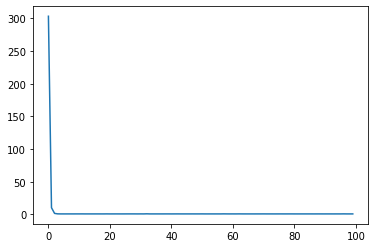

In [55]:
plt.plot(history)

In [56]:
W= torch.tensor([[10.0]], requires_grad=True)
b= torch.tensor([20.0], requires_grad =True)

lr=0.01
history=[]
def myloss(yhat, y):
  return torch.mean((yhat-y)**2)
epochs=100
for i in range(epochs):
  for xx, yy in trainloader:
    yhat=xx@W + b
    current_loss = myloss(yhat, yy)
    current_loss.backward()
    W.data = W.data- lr * W.grad.data
    b.data = b.data-lr * b.grad.data
    W.grad.zero_()
    b.grad.zero_()


In [57]:
print(w,b)

tensor(1.8876, requires_grad=True) tensor([-0.8746], requires_grad=True)


In [58]:
def forward(X):
  return X@W+b

In [59]:
history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss=criterion(Yhat, Y)


## Exercise: 

Repeat the above procedure with 

   1> batch size equals 5
   
   2> XX[i, :]=torch.tensor([1.0, X[i]]) without using the intercept.

In [61]:
#with concatenate
# X:[60,1]
# one: [60,1]

one = torch.ones([60,1])
XX = torch.concat([one, X], axis=1)
beta= torch.tensor([[10.0], [5.0]], requires_grad=True)
lr=0.01
history=[]

trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True) #shuffle : 섞자 
dataset = TensorDataset(XX, Y)

In [62]:
def myloss(yhat, y):
  return torch.mean((yhat-y)**2)
epochs=100
for i in range(epochs):
  epoch_loss = 0
  for xx, yy in trainloader: #xx : [batch, 2], yy:[batch,1]
    yhat = XX @ beta
    current_loss = myloss(yhat, yy)
    current_loss.backward()
    beta.data = beta.data- lr * beta.grad.data
    beta.grad.zero_()
    epoch_loss += current_loss * len(xx)
  history.append(epoch_loss.item()/60)



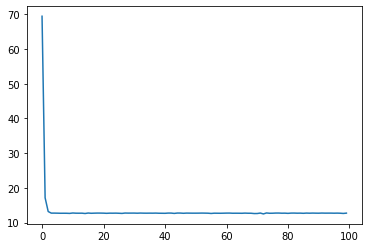

In [63]:
plt.plot(history)

# 4. Stochastic Gradient Descent (SGD) using Pytorch functions



In [64]:
from torch import nn, optim

In [65]:
Yhat = XX@beta

In [67]:
def forward(XX):
  return XX@beta

In [68]:
forward = torch.nn.Linear(3,2) ## X @ W 선언하는 것과 동일 작업
## beta=torch tensor ([[10.0], [5.0]], requuires_grad = True)


In [69]:
temp = nn.Linear(2,3,bias = True ) #베타는 보여주지 마세요

In [ ]:
dir(temp)

In [71]:
temp?


In [72]:
myx = torch.tensor([[3.0, 2.0, 1],[4.0, 3.0, 0]])

In [73]:
forward(myx)

tensor([[ 0.9724, -1.5185],
        [ 1.9158, -2.5609]], grad_fn=<AddmmBackward0>)

In [74]:
W = list(forward.parameters())[0].T
print(W)
b = list(forward.parameters())[0].T
print(b)

tensor([[ 0.1361, -0.5428],
        [ 0.5722, -0.2773],
        [-0.2350,  0.2223]], grad_fn=<PermuteBackward0>)
tensor([[ 0.1361, -0.5428],
        [ 0.5722, -0.2773],
        [-0.2350,  0.2223]], grad_fn=<PermuteBackward0>)


In [75]:
print(temp.weight, temp.bias)



Parameter containing:
tensor([[ 0.2755,  0.3341],
        [-0.2572, -0.2988],
        [-0.5421,  0.0962]], requires_grad=True) Parameter containing:
tensor([0.5413, 0.4829, 0.4152], requires_grad=True)


Now, we obtain

$Z = \left(
  \begin{array}{cc}
    2.0 & 1.0 \\
    1.0 & -1.0 \\
  \end{array}
\right)$

and calculate 

$\widehat{Y}=Z\, W^T +b$

In [77]:
Z = torch.tensor([[2.0, 1.0], 
                         [1.0, -1.0]])
print(temp(Z))

tensor([[ 1.4265, -0.3303, -0.5727],
        [ 0.4827,  0.5245, -0.2231]], grad_fn=<AddmmBackward0>)


In [78]:
Z @ temp.weight.T +temp.bias

tensor([[ 1.4265, -0.3303, -0.5727],
        [ 0.4827,  0.5245, -0.2231]], grad_fn=<AddBackward0>)

In [79]:
for i in temp.parameters():
  print(i)

Parameter containing:
tensor([[ 0.2755,  0.3341],
        [-0.2572, -0.2988],
        [-0.5421,  0.0962]], requires_grad=True)
Parameter containing:
tensor([0.5413, 0.4829, 0.4152], requires_grad=True)


In [81]:
###################
### Do not run ####
###################

class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        f = w0*self.x+b0
        self.y = f+torch.randn(f.shape)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
dataset = Data()

In [82]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

lr=0.01
history = []
for i in range(100):
  

SyntaxError: ignored

In [83]:
forward = torch.nn.Linear() #이렇게 선언해도 됨

TypeError: ignored

In [84]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)
model = nn.Linear(1,1)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #torch

In [ ]:
dataset.tensors[0]

In [ ]:
dir(dataset)

In [87]:
dataset = TensorDataset(XX,Y)
trainloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

beta=torch.tensor([[10.0],
                   [-5.0]],requires_grad=True)

lr=0.01
history=[]

def myloss(yhat,y):
  return torch.mean((yhat-y)**2)

#return w@beta
forward=torch.nn.Linear(2,1,bias=False) #w
optimizer=torch.optim.SGD(forward.parameters(),lr=0.01)
#optimizer.step()
#toward.parameters()=forward.parameters()-lr*gradient

epochs=100 #학습 횟수/batch_size랑 조절해서
for i in range(epochs):
  epoch_loss=0
  for xx,yy in trainloader: #xx:[batch,2],yy:[batch,1]
      yhat= forward(xx)
      current_loss=myloss(yhat,yy)
      current_loss.backward()
      optimizer.step()#beta.data=beta.data-lr*beta.grad.data
      optimizer.zero_grad()
      epoch_loss+=current_loss*len(xx)
  history.append(epoch_loss.item()/60)

In [88]:
iters = 30
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    epoch_loss += current_loss * len(xx)
  history.append(epoch_loss.item()/60)


RuntimeError: ignored

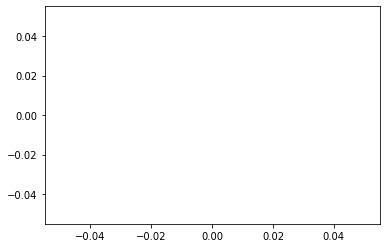

In [89]:
plt.plot(history)

In [ ]:
list(model.parameters())

In [ ]:
model.state_dict()

In [ ]:
model.weight

#### 여기서부터 시작
### Exercise:

1.   Calculate MSE (mean squared error).
1.   Calculate MAE (mean absolute error).
2.   Assume that you are given ```x=1```. What woud be your yhat?






#5. Custom layer

Repeat the above procedure with user defined layer.

In [90]:
nn.Linear?

## 5.1 Using torch.nn module

In [91]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

In [92]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = linear_regression(1,1)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [93]:
iters = 30
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


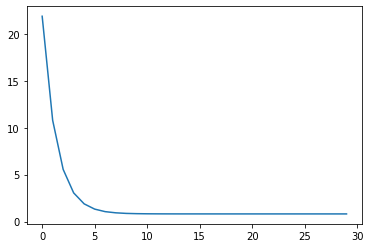

In [94]:
plt.plot(history)

## 5.2 Defining the parameters and model directly.

In [95]:
class my_linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(my_linear_regression, self).__init__()
    self.w = nn.Parameter(torch.randn(1,1), requires_grad=True)
    self.b = nn.Parameter(torch.randn(1), requires_grad=True)
  def forward(self,x):
    yhat = x @ self.w.T +b
    return yhat

In [96]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = my_linear_regression(1,1)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [97]:
iters = 30
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


RuntimeError: ignored

In [ ]:
plt.plot(history)

In [ ]:
list(model.parameters())

In [ ]:
model.state_dict()

## Exercise: 

By using the following command, 

```
self.linear = nn.Linear(input_size, output_size, bias=False)
```

you obtain the linear layer without a bias. Then, you want to add a bias `b` manually in your customed layer. Train the model.

## Exercise: 

By using the following command, 

```
self.linear = nn.Linear(input_size, output_size, bias=False)
```

you obtain the linear (customed) layer without a bias. Then, you want to add a bias `b` manually in outside of the customed layer. Train the model.

In [98]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
dataset = TensorDataset(X,Y)

In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True)

In [ ]:
class my_linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(my_linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size, bias=False)
  def forward(self,x):
    yhat = self.linear(x)
    return yhat


In [ ]:
import itertools

In [ ]:
list(model.parameters())

In [ ]:
list(b)

In [ ]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = my_linear_regression(1,1)
b = nn.Parameter(torch.randn(1), requires_grad=True)
all_params = list(model.parameters())+list([b])
#itertools.chain(model.parameters(), b)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(all_params, lr=0.001)

In [ ]:
iters = 500
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)+b
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


In [ ]:
plt.plot(history)

In [ ]:
b

In [ ]:
list(model.parameters())

In [ ]:
model(torch.tensor([[2.5000]]))+b #4.88

In [ ]:
x[:1]

In [ ]:
-1.32/2